In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import os, shutil

In [3]:
base_dir = 'fashion_data'

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
ClothesList = ['top_hoodie_black_pattern', 'top_hoodie_black_plain', 'top_hoodie_blue_pattern',
          'top_hoodie_blue_plain', 'top_hoodie_brown_pattern', 'top_hoodie_brown_plain',
          'top_hoodie_green_pattern', 'top_hoodie_green_plain', 'top_hoodie_grey_pattern',
          'top_hoodie_grey_plain', 'top_hoodie_red_pattern', 'top_hoodie_red_plain',
          'top_hoodie_white_pattern', 'top_hoodie_white_plain', 'top_hoodie_yellow_pattern',
          'top_hoodie_yellow_plain']

In [5]:
for cl in ClothesList :
    globals()['train_{}'.format(cl)] = os.path.join(train_dir, cl)
    
for cl in ClothesList :
    globals()['validation_{}'.format(cl)] = os.path.join(validation_dir, cl)
    
for cl in ClothesList :
    globals()['test_{}'.format(cl)] = os.path.join(test_dir, cl)

In [6]:
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

In [7]:
conv_base = ResNet50(weights = 'imagenet',
                    include_top = False,
                    input_shape = (150,150,3))

c:\users\82104\anaconda3\envs\py36\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [8]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [9]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 5, 5, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               13107456  
_________________________________________________________________
dense_2 (Dense)              (None, 16)                4112      
Total params: 36,699,280
Trainable params: 36,646,160
Non-trainable params: 53,120
_________________________________________________________________


In [11]:
print('conv_base를 동결하기 전 훈련되는 가중치의 수:', 
      len(model.trainable_weights))
conv_base.trainable = False
print('conv_base를 동결한 후 훈련되는 가중치의 수:', 
      len(model.trainable_weights))

conv_base를 동결하기 전 훈련되는 가중치의 수: 216
conv_base를 동결한 후 훈련되는 가중치의 수: 4


In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2068 images belonging to 16 classes.
Found 249 images belonging to 16 classes.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
 - 40s - loss: 1.1717 - acc: 0.6576 - val_loss: 3.3288 - val_acc: 0.1014
Epoch 2/100
 - 34s - loss: 0.6155 - acc: 0.8030 - val_loss: 3.8384 - val_acc: 0.0764
Epoch 3/100
 - 35s - loss: 0.4783 - acc: 0.8479 - val_loss: 4.0675 - val_acc: 0.0128
Epoch 4/100
 - 34s - loss: 0.4177 - acc: 0.8676 - val_loss: 3.8804 - val_acc: 0.0935
Epoch 5/100
 - 35s - loss: 0.3996 - acc: 0.8745 - val_loss: 4.1758 - val_acc: 0.0270
Epoch 6/100
 - 34s - loss: 0.3246 - acc: 0.8959 - val_loss: 4.3826 - val_acc: 0.0257
Epoch 7/100
 - 34s - loss: 0.3228 - acc: 0.9063 - val_loss: 4.4552 - val_acc: 0.0995
Epoch 8/100
 - 34s - loss: 0.3010 - acc: 0.9087 - val_loss: 4.9246 - val_acc: 0.0896
Epoch 9/100
 - 34s - loss: 0.2697 - acc: 0.9174 - val_loss: 5.1202 - val_acc: 0.0899
Epoch 10/100
 - 34s - loss: 0.2663 - acc: 0.9181 - val_

Epoch 89/100
 - 33s - loss: 0.1073 - acc: 0.9743 - val_loss: 11.8356 - val_acc: 0.0841
Epoch 90/100
 - 33s - loss: 0.1045 - acc: 0.9738 - val_loss: 11.8032 - val_acc: 0.0854
Epoch 91/100
 - 33s - loss: 0.1065 - acc: 0.9738 - val_loss: 11.3765 - val_acc: 0.0911
Epoch 92/100
 - 33s - loss: 0.1015 - acc: 0.9731 - val_loss: 11.5454 - val_acc: 0.0838
Epoch 93/100
 - 33s - loss: 0.0963 - acc: 0.9746 - val_loss: 11.3562 - val_acc: 0.0777
Epoch 94/100
 - 33s - loss: 0.1140 - acc: 0.9712 - val_loss: 10.6156 - val_acc: 0.0796
Epoch 95/100
 - 33s - loss: 0.1053 - acc: 0.9700 - val_loss: 11.3535 - val_acc: 0.0822
Epoch 96/100
 - 33s - loss: 0.1006 - acc: 0.9722 - val_loss: 11.4559 - val_acc: 0.0774
Epoch 97/100
 - 34s - loss: 0.0896 - acc: 0.9738 - val_loss: 11.1259 - val_acc: 0.0796
Epoch 98/100
 - 33s - loss: 0.1141 - acc: 0.9716 - val_loss: 11.3430 - val_acc: 0.0802
Epoch 99/100
 - 33s - loss: 0.0820 - acc: 0.9747 - val_loss: 11.9876 - val_acc: 0.0969
Epoch 100/100
 - 33s - loss: 0.0930 - acc: 

In [13]:
model.save('1130_jacketmodel_1.h5')

In [14]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [15]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=200,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
200/200 [==============================] - 37s 187ms/step - loss: 4.5486 - acc: 0.6654 - val_loss: 3.6462 - val_acc: 0.7298
Epoch 2/100
200/200 [==============================] - 35s 174ms/step - loss: 3.2459 - acc: 0.7592 - val_loss: 2.8252 - val_acc: 0.7888
Epoch 3/100
200/200 [==============================] - 34s 172ms/step - loss: 2.9981 - acc: 0.7796 - val_loss: 4.0733 - val_acc: 0.6983
Epoch 4/100
200/200 [==============================] - 35s 173ms/step - loss: 2.7847 - acc: 0.7990 - val_loss: 3.2563 - val_acc: 0.7651
Epoch 5/100
200/200 [==============================] - 34s 171ms/step - loss: 2.8190 - acc: 0.7996 - val_loss: 3.1450 - val_acc: 0.7760
Epoch 6/100
200/200 [==============================] - 34s 170ms/step - loss: 2.9216 - acc: 0.7971 - val_loss: 3.7050 - val_acc: 0.7490
Epoch 7/100
200/200 [==============================] - 34s 172ms/step - loss: 2.7488 - acc: 0.8078 - val_loss: 4.0025 - val_acc: 0.7286
Epoch 8/100
200/200 [===========================

Epoch 61/100
200/200 [==============================] - 33s 167ms/step - loss: 1.8480 - acc: 0.8765 - val_loss: 2.2412 - val_acc: 0.8460
Epoch 62/100
200/200 [==============================] - 34s 169ms/step - loss: 1.8134 - acc: 0.8819 - val_loss: 2.3102 - val_acc: 0.8530
Epoch 63/100
200/200 [==============================] - 33s 167ms/step - loss: 1.8345 - acc: 0.8796 - val_loss: 2.9261 - val_acc: 0.8104
Epoch 64/100
200/200 [==============================] - 33s 166ms/step - loss: 1.7615 - acc: 0.8847 - val_loss: 2.3585 - val_acc: 0.8293
Epoch 65/100
200/200 [==============================] - 33s 166ms/step - loss: 1.7794 - acc: 0.8836 - val_loss: 2.3740 - val_acc: 0.8492
Epoch 66/100
200/200 [==============================] - 33s 165ms/step - loss: 1.7902 - acc: 0.8837 - val_loss: 2.5467 - val_acc: 0.8350
Epoch 67/100
200/200 [==============================] - 33s 167ms/step - loss: 1.6310 - acc: 0.8925 - val_loss: 2.9880 - val_acc: 0.8130
Epoch 68/100
200/200 [===================

In [17]:
model.save('1130_jacketmodel_2.h5')

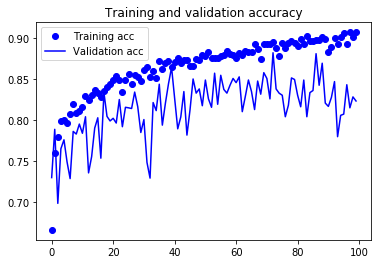

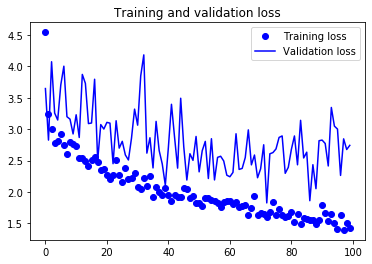

In [18]:
import matplotlib as mpl
import matplotlib.pylab as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 80 images belonging to 16 classes.
test acc: 0.7629999995231629
